<a href="https://colab.research.google.com/github/AngelD40804/Machine-Learning-Fundamentals/blob/Final/Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import layers, models
from keras.layers import Dense, Flatten
from keras.models import Sequential
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
dataset_path = '/content/drive/MyDrive/MLF_FILES/x_train/train_data_unlabeled'


image_files = os.listdir(dataset_path)
image_files = sorted(image_files, key=lambda x: x.split('_')[1][:-4])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MLF_FILES/x_train/train_data_unlabeled'

In [ ]:

y_train_read = pd.read_csv("/content/drive/MyDrive/MLF_FILES/y_train.csv")
image_labels = []
image_dict = {}

for index, row in y_train_read.iterrows():
    image_id = int(row['id'])
    label = int(row['target'])
    if label != 0:
      image_dict[image_id+1] = label
    else:
      image_dict[image_id+1] = 1

# n_image_files = []
for idx in image_files:
  idx = int(idx.split('_')[1][:-4])
  image_labels.append(image_dict[idx])

# for index, row in y_train_read.iterrows():
#     image_id = int(row['id'])
#     label = int(row['target'])
#     image_dict[image_id+1] = label

# # n_image_files = []
# for idx in image_files:
#   idx = int(idx.split('_')[1][:-4])
#   image_labels.append(image_dict[idx])

In [ ]:
n_image_files

In [ ]:
x_uploaded = []

for im in image_files:
    image_path = os.path.join(dataset_path, im)
    # print(image_path)
    image = Image.open(image_path)
    # image = image.convert("L")
    image_array = np.asarray(image)
    image_array = image_array[:, :, :3]

    x_uploaded.append(image_array)


In [ ]:
# x_train = (np.expand_dims(np.array(x_uploaded),-1)).astype('float32') / 255.0
x_train = (np.array(x_uploaded)).astype('float64') / 255.0
# x_train = (np.array(x_uploaded))

y_train = np.array(image_labels)

<Figure size 640x480 with 0 Axes>

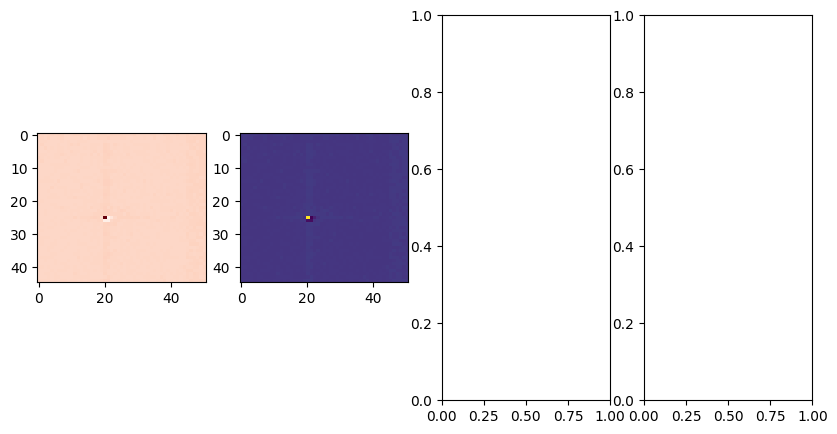

In [ ]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  # axs[1].imshow(image[:,:,1],cmap='Blues')
  # axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[1].imshow(image)

  plt.show()

display_channels_separately(x_train[900])

In [ ]:
min(y_train)

1

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
# y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=4)

In [ ]:
y_train_encoded

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
from tensorflow.python.keras import regularizers
from keras.optimizers import SGD, Adam


def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(64, (4, 4), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l1(0.01)),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        # layers.Dropout(0.25),

        layers.Conv2D(128, (4, 4), activation='relu', kernel_regularizer=regularizers.l1(0.01)),# input_shape=input_shape),# kernel_regularizer=regularizers.l1(0.01)),
        layers.MaxPooling2D((2, 2)),
        # layers.BatchNormalization(),
        layers.Dropout(0.25),

        layers.Conv2D(256, (4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        # layers.BatchNormalization(),
        layers.Dropout(0.25),

        layers.Flatten(),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (45, 51, 1)
num_classes = 4

model = create_cnn_model(input_shape, num_classes)
optimizer = SGD(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_248 (Conv2D)         (None, 42, 48, 64)        1088      
                                                                 
 max_pooling2d_183 (MaxPool  (None, 21, 24, 64)        0         
 ing2D)                                                          
                                                                 
 batch_normalization_15 (Ba  (None, 21, 24, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_249 (Conv2D)         (None, 18, 21, 128)       131200    
                                                                 
 max_pooling2d_184 (MaxPool  (None, 9, 10, 128)        0         
 ing2D)                                                          
                                                    

In [ ]:
history = model.fit(x_train, y_train_encoded, epochs=500, batch_size=50, validation_split = 0.2)



Epoch 1/500
259/259 [==============================] - 6s 15ms/step - loss: 29.0012 - accuracy: 0.4221 - val_loss: 27.4553 - val_accuracy: 0.4325
Epoch 2/500
259/259 [==============================] - 3s 13ms/step - loss: 25.6718 - accuracy: 0.5037 - val_loss: 24.2246 - val_accuracy: 0.6101
Epoch 3/500
259/259 [==============================] - 3s 13ms/step - loss: 22.6051 - accuracy: 0.5493 - val_loss: 21.1404 - val_accuracy: 0.6321
Epoch 4/500
259/259 [==============================] - 3s 13ms/step - loss: 19.7658 - accuracy: 0.5867 - val_loss: 18.3796 - val_accuracy: 0.6296
Epoch 5/500
259/259 [==============================] - 3s 13ms/step - loss: 17.1398 - accuracy: 0.6063 - val_loss: 15.8593 - val_accuracy: 0.6382
Epoch 6/500
259/259 [==============================] - 3s 13ms/step - loss: 14.7297 - accuracy: 0.6185 - val_loss: 13.5530 - val_accuracy: 0.6293
Epoch 7/500
259/259 [==============================] - 3s 13ms/step - loss: 12.5234 - accuracy: 0.6246 - val_loss: 11.4509 -

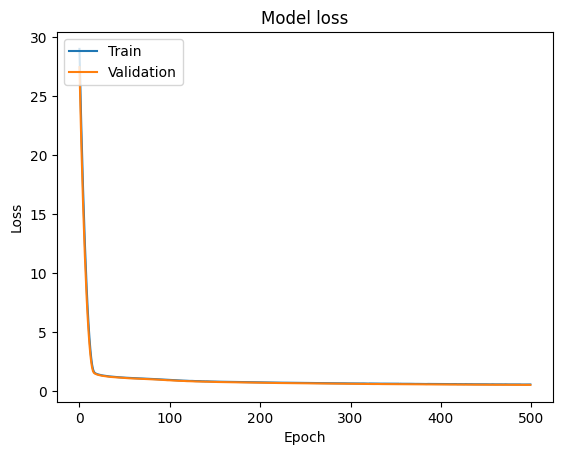

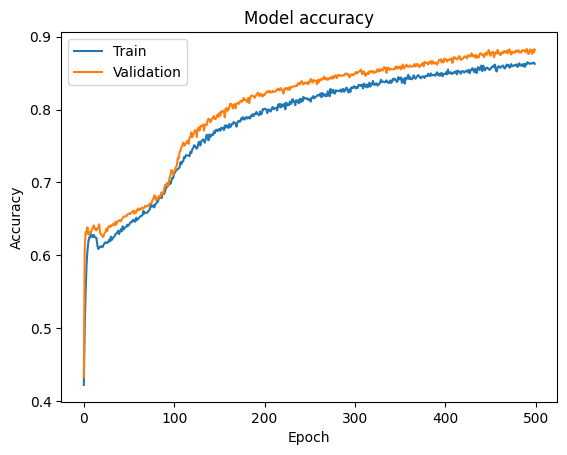

In [ ]:
import matplotlib.pyplot as plt


def plot_loss_accuracy(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_loss_accuracy(history)


In [ ]:
dataset_path_test = '/content/drive/MyDrive/MLF_FILES/x_test/test_data_unlabeled'

image_files_test = os.listdir(dataset_path_test)

x_uploaded_test = []

for im_t in image_files_test:
    image_path_t = os.path.join(dataset_path_test, im_t)
    image_t = Image.open(image_path_t)
    image_array_t = np.asarray(image_t)
    image_array_t = image_array_t[:, :, :1]
    x_uploaded_test.append(image_array_t)



In [ ]:
# predictions = []
# for batch_data in test_data_batched:
#     batch_predictions = model.predict_on_batch(batch_data)
#     predictions.append(batch_predictions)
# predictions = np.concatenate(predictions, axis=0)


In [ ]:
x_test = (np.array(x_uploaded_test)).astype('float64') / 255.0
y_test_dict = {}

predictions = model.predict(x_test)
y_test = np.argmin(predictions, axis=1)

for idx_t in image_files_test:
  idx_t = int(idx_t.split('_')[1][:-4])
  y_test_dict[f'{idx_t}'] = y_test[idx_t-1]



150/150 [==============================] - 1s 3ms/step


In [ ]:
x_test.shape

(4796, 45, 51, 3)

In [ ]:
len(y_test_dict)

4796

In [ ]:
# Convert keys to integers, sort them, and reconstruct the dictionary
# y_sorted = {float(key): y_test_dict[key] for key in sorted(y_test_dict.keys())}

id_test, target_test = [], []
y_testt = {
    'id' : id_test,
    'target' : target_test

    }
for k_ in range(4796):
  id_test.append(k_)
  target_test.append(y_test_dict[f'{k_+1}'])
# print("Original Dictionary:", original_dict)
# print("Sorted Dictionary:", sorted_dict)

In [ ]:
import csv

with open('y_test_file.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=y_testt.keys())
    writer.writeheader()
    for row in zip(*y_testt.values()):
        writer.writerow(dict(zip(y_testt.keys(), row)))

print("CSV file has been created:", os.path.abspath('y_test_file'))



CSV file has been created: /content/y_test_file
